<a href="https://colab.research.google.com/github/hilmialfar/hilmialfaryan.github.io/blob/main/Student_Mental_Health_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Mental Health Issues**

**A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA DATASET**

Dataset from [Kaggle](https://www.kaggle.com/datasets/shariful07/student-mental-health)

> This dataset was collected by a survey conducted by **google forms from university student on July 8 to 18, 2020** in order to examine their **current academic situation and mental health**.

##**Import Libraries & Load Data**

In [40]:
#import library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
#import dataset
df = pd.read_csv("/content/drive/MyDrive/module_&_data/Data/Student Mental health.csv", encoding='unicode_escape') 
df.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


##**Exploratory Data Analysis**

In [43]:
#Information about this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [44]:
#Checking datasets shape
df.shape

(101, 11)

> **Insight**

* There is a **missing value** in the `Age` column.
* The data type of `Age` is float64 while age is an **integer** so it needs to be converted to integer data type.
* The column name is **too long** so it needs to be shortened.
* The data type of the columns `Do you have Depression`, `Do you have Anxiety`, `Do you have Panic attack`, and `Did you seek any specialist for a treatment?`, must be **Boolean**.
* This dataset has **11 columns and 101 rows**.



> **Action**

* Removed the `Timestamp` field because it only shows when the audience filled out the form, so it is not needed in the analysis.

In [45]:
#Remove the column 'Timestamp' as it is not used.
df.drop(['Timestamp'], axis = 1, inplace = True)

> **Action**

* Shorten the column name.

In [46]:
#Rename columns
df_column = {'Choose your gender':'Gender','What is your course?':'Course',
             'Your current year of Study':'Year Study','What is your CGPA?':'CGPA',
             'Do you have Depression?':'Depression', 'Marital status':'Marital',
             'Do you have Anxiety?':'Anxiety', 'Do you have Panic attack?':'Panic Attack',
             'Did you seek any specialist for a treatment?':'Treatment'}
df.rename(columns=df_column,inplace=True)
df.head()

,Gender,Age,Course,Year Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


> **Action**

* Convert the data type of the columns `Marital`, `Depression`, `Anxiety`, `Panic Attack`, and `Treatment?` to data type Boolean.

In [47]:
# Convert data types
df[['Marital','Depression', 'Anxiety', 'Panic Attack', 'Treatment']] = df[['Marital','Depression', 'Anxiety', 
                                                                 'Panic Attack', 'Treatment']].replace(['Yes', 'No'],
                                                                                                       [True, False])
df[['Marital','Depression', 'Anxiety', 'Panic Attack', 'Treatment']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Marital       101 non-null    bool 
 1   Depression    101 non-null    bool 
 2   Anxiety       101 non-null    bool 
 3   Panic Attack  101 non-null    bool 
 4   Treatment     101 non-null    bool 
dtypes: bool(5)
memory usage: 633.0 bytes


In [48]:
#Check Dataframe
df.head()

,Gender,Age,Course,Year Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,False,True,False,True,False
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,False,False,True,False,False
2,Male,19.0,BIT,Year 1,3.00 - 3.49,False,True,True,True,False
3,Female,22.0,Laws,year 3,3.00 - 3.49,True,True,False,False,False
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,False,False,False,False,False


### **Missing Value**

> **Action**
* Checking missing value

In [49]:
#Checking missing values
df.isnull().sum()

Gender          0
Age             1
Course          0
Year Study      0
CGPA            0
Marital         0
Depression      0
Anxiety         0
Panic Attack    0
Treatment       0
dtype: int64

> **Insight**
* There is **1 missing value** in the `Age` column. In order not to become an error in the analysis, **it will be deleted**.

In [50]:
#Replacing missing value with central tendency
df = df.dropna()
df.isna().sum()

Gender          0
Age             0
Course          0
Year Study      0
CGPA            0
Marital         0
Depression      0
Anxiety         0
Panic Attack    0
Treatment       0
dtype: int64

In [51]:
df.shape

(100, 10)

> **Insight**
* The rows became **100** because **1 row** containing **missing values was deleted**.

### Data Formatting & Cleaning

> **Action **
* Convert `Age` data type to integer



In [52]:
#Convert data type of Age column to int data type
df['Age'] = df['Age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        100 non-null    object
 1   Age           100 non-null    int64 
 2   Course        100 non-null    object
 3   Year Study    100 non-null    object
 4   CGPA          100 non-null    object
 5   Marital       100 non-null    bool  
 6   Depression    100 non-null    bool  
 7   Anxiety       100 non-null    bool  
 8   Panic Attack  100 non-null    bool  
 9   Treatment     100 non-null    bool  
dtypes: bool(5), int64(1), object(4)
memory usage: 5.2+ KB


<ipython-input-52-f274c40fd302>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)


> **Action**
* Checking the number of unique values for each column.

In [53]:
#Checking for the number of unique variables per column.
df.nunique()

Gender           2
Age              7
Course          49
Year Study       7
CGPA             6
Marital          2
Depression       2
Anxiety          2
Panic Attack     2
Treatment        2
dtype: int64

> **Action**
* Checked the unique values of the `Year Study`, `CGPA` and `Course` columns to see if there were any errors or inconsistencies in the unique values.

In [54]:
#Checking unique value
df["Year Study"].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

> **Insight**
* There is an **inconsistency in the unique value** of the `Year of Study` column which actually has the same value as `Year 2` with `Year 2` so it needs to be customized.

In [55]:
#Replace unique value
df['Year Study'].replace(['year 1','year 2','year 3','year 4'],['Year 1','Year 2','Year 3','Year 4'], inplace=True)
df["Year Study"].unique()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array(['Year 1', 'Year 2', 'Year 3', 'Year 4'], dtype=object)

In [56]:
#Checking unique value of CGPA (column)
df["CGPA"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

> **Insight** 
* There is an **inconsistency of unique values** in the `CGPA` column such as `3.50 - 4.00` with `3.50 - 4.00 ` so it needs to be customized.

In [57]:
#Replace unique value
df.replace({'3.50 - 4.00 ':'3.50 - 4.00'},regex=True,inplace=True)
df["CGPA"].unique()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [58]:
#Counting the number of each unique variable
df['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

> **Insight**
* `Course` column contains many **unique value inconsistencies.**

In [59]:
#Replace and customizing unique values
df['Course'] = df['Course'].str.strip()
df['Course'] = df['Course'].str.lower()
df['Course'].replace(['pendidikan islam','laws','engin','engine','bit','benl','econs','mhsc','cts','enm','bcs'],
                     ['islamic education','law','engineering','engineering','it','human sciences','economics','health science(master)','career technology studies','engineering mathematics','computer science'], inplace=True)
df["Course"].unique()

array(['engineering', 'islamic education', 'it', 'law', 'mathemathics',
       'computer science', 'human resources', 'irkhs', 'psychology',
       'kenms', 'accounting', 'engineering mathematics', 'marine science',
       'koe', 'banking studies', 'business administration', 'kirkhs',
       'usuluddin', 'taasl', 'ala', 'biomedical science',
       'human sciences', 'career technology studies', 'economics',
       'health science(master)', 'malcom', 'kop', 'biotechnology',
       'communication', 'diploma nursing', 'radiography', 'fiqh fatwa',
       'diploma tesl', 'fiqh', 'nursing'], dtype=object)

### **Summary Statistics**

> **Action**
* Checking Summary Statistics

In [60]:
#Summary Statistics Dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,100,2,Female,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100.0,NaN,NaN,NaN,20.53,2.49628,18.0,18.0,19.0,23.0,24.0
Course,100,35,engineering,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year Study,100,4,Year 1,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGPA,100,5,3.50 - 4.00,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital,100,2,False,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depression,100,2,False,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anxiety,100,2,False,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Panic Attack,100,2,False,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Treatment,100,2,False,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> **Insight**
* The gender of the respondents was mostly **female** at around **75%**.
* The youngest respondent was **18 years old** and the oldest was **24 years old**.
* Course majority of respondents are **engineering**.
* The majority of respondents were in their **first year of university**.
* The majority of respondents had a CGPA of **3.50 - 4.00**.
* **84%** of respondents are **single**.
* There were **35 respondents** who had **depression issues**.
* **34%** of respondents had **anxiety issues**.
* Respondents who had **panic attacks issues** were **33 people**.
* Just **6** respondents need a **specialist for treatment**.

### **Skewness Distribution and Boxplot**

> **Action**
* Check skewnees and boxplot of `Age` column

Age
Skew : 0.38


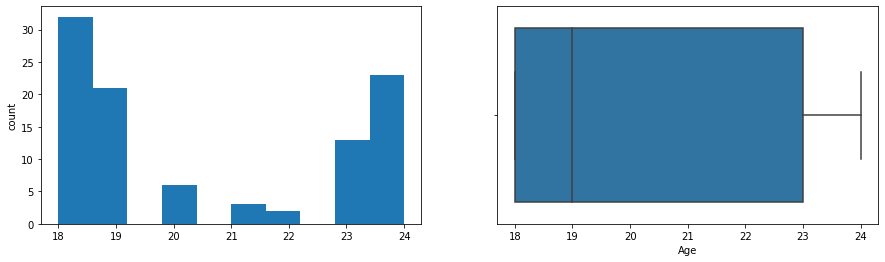

In [61]:
# Check skewnees and boxplot of Age column
df_age = df[['Age']]


for col in df_age:
    print(col)
    print('Skew :', round(df_age[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df_age[col].plot(kind='hist')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_age[col])
    plt.show()

> **Insight**
* There are **no outliers**
* Skewnees : **0.38** (**distribution is fairly symmetrical**)

* A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

##**Mental Health Analysis**
> Does mental health affect students' CGPA?

> Let me show you!

In [62]:
#Creating a dataframe of students not have Depression, Anxiety, and Panic Attack
no = df[(df["Depression"]==False) & (df["Anxiety"]==False) & (df["Panic Attack"]==False)].reset_index(drop=True)
no

,Gender,Age,Course,Year Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
0,Male,23,mathemathics,Year 4,3.00 - 3.49,False,False,False,False,False
1,Female,19,human resources,Year 2,2.50 - 2.99,False,False,False,False,False
2,Female,20,psychology,Year 1,3.50 - 4.00,False,False,False,False,False
3,Male,19,engineering,Year 1,3.00 - 3.49,False,False,False,False,False
4,Male,24,computer science,Year 3,3.50 - 4.00,False,False,False,False,False
5,Female,24,accounting,Year 3,3.00 - 3.49,False,False,False,False,False
6,Female,18,koe,Year 2,3.00 - 3.49,False,False,False,False,False
7,Female,24,computer science,Year 1,3.50 - 4.00,False,False,False,False,False
8,Female,24,engineering,Year 1,3.00 - 3.49,False,False,False,False,False
9,Female,18,banking studies,Year 1,3.50 - 4.00,False,False,False,False,False


> **Insight**
* There were **35 students** who did not experience any of the three mental health issues.
* So, there were **75 students** who experienced one of the mental health issues.

> **Question**
* What about their CGPA?

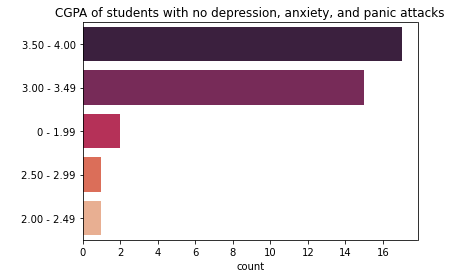

In [63]:
#Visualization of the number of respondents who do not have mental health issues based on CGPA.
sns.countplot(y='CGPA', data=no, order=no['CGPA'].value_counts().index,
              palette="rocket")
plt.ylabel(' ')
plt.title('CGPA of students with no depression, anxiety, and panic attacks')
plt.show()

> **Insight**
 * **Students without mental health issues** mostly had a **CGPA of 3.50-4.00**.

> **Question**
* What is the GPA of students who have mental health issues?

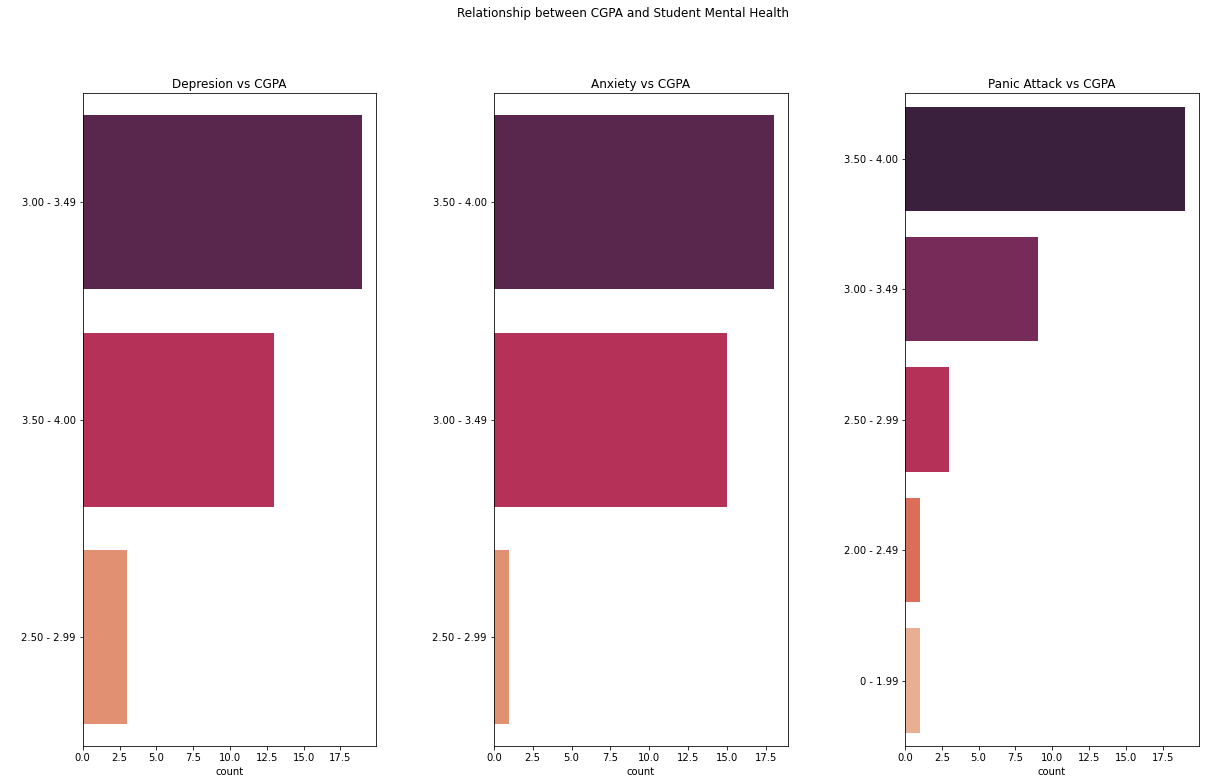

In [64]:
#Filtering student who have depression, anxiety, or panic attack
dep = df[df["Depression"]== True]
anx = df[df["Anxiety"]== True]
pa = df[df["Panic Attack"]== True]

#Visualization of the number of respondents with mental health issues by CGPA.
fig, axs = plt.subplots(1, 3, figsize=(20, 12))
fig.suptitle('Relationship between CGPA and Student Mental Health')

sns.countplot(ax=axs[0], y='CGPA', data=dep, order=dep['CGPA'].value_counts().index,
              palette="rocket")
axs[0].set_title('Depresion vs CGPA')
axs[0].set_ylabel(' ')

sns.countplot(ax=axs[1], y='CGPA', data=anx, order=anx['CGPA'].value_counts().index,
              palette="rocket")
axs[1].set_title('Anxiety vs CGPA')
axs[1].set_ylabel(' ')

sns.countplot(ax=axs[2], y='CGPA', data=pa, order=pa['CGPA'].value_counts().index,
              palette="rocket")
axs[2].set_title('Panic Attack vs CGPA')
axs[2].set_ylabel(' ')

plt.subplots_adjust(wspace=0.4)
plt.show()

> **Insight**
* Students with **anxiety or panic attack issues** mostly have a **GPA of 3.50 - 4.00**, while students with **depression issues** mostly have a **GPA of 3.00 - 3.49**.

> **Question**
* What is the CGPA of students who have all three mental health?

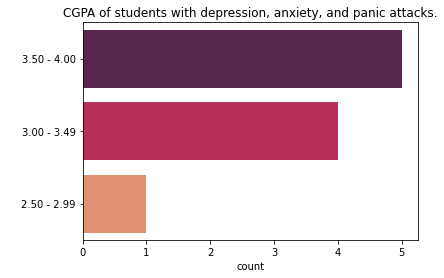

In [65]:
#Create a data frame of students who have all three mental health issues (Depression, Anxiety, and Panic Attacks)
DAP = df[(df["Depression"]==True) & (df["Anxiety"]==True) & (df["Panic Attack"]==True)].reset_index(drop=True)

##Visualization of student CGPA based on students who have all three mental health issues (Depression, Anxiety, and Panic Attacks).
sns.countplot(y='CGPA', data=DAP, order=DAP['CGPA'].value_counts().index,
              palette="rocket")
plt.ylabel(' ')
plt.title('CGPA of students with depression, anxiety, and panic attacks.')
plt.show()

>**Insight**
* Students who have issues with **depression, anxiety and panic attacks** majority have the highest GPA of **3.50 - 4.00**.

>**Question**
* Do all students with one or more mental health issues require treatment?

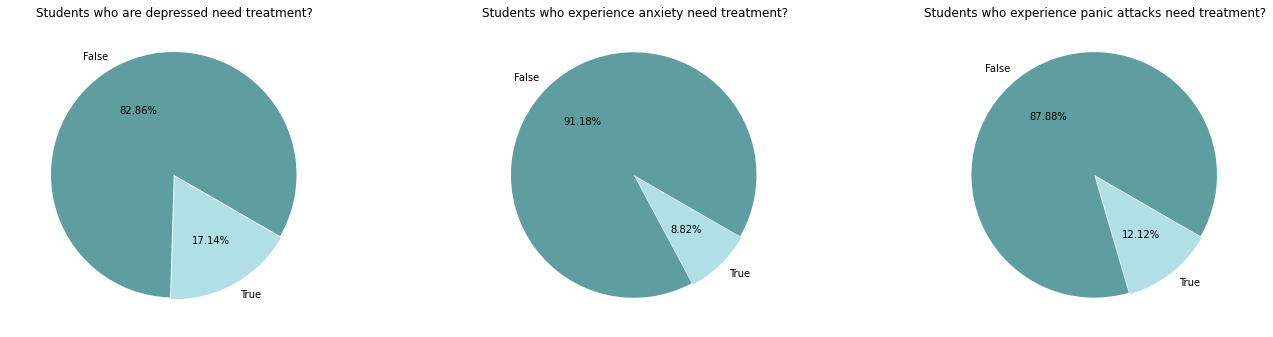

In [66]:
#Filtering student who have depression, anxiety, or panic attack
dep = df[df["Depression"]== True]
anx = df[df["Anxiety"]== True]
pa = df[df["Panic Attack"]== True]

#Visualization who need treatment
fig, axs = plt.subplots(1, 3, figsize=(22, 16))

dep['Treatment'].value_counts().plot(ax=axs[0], kind='pie',
                                       autopct = "%.2f%%", colors=['cadetblue','powderblue'], explode=(0.015,0),
                                       startangle= -30, ylabel=' ')
axs[0].set_title(label='Students who are depressed need treatment?', fontdict=None, loc='center')

anx['Treatment'].value_counts().plot(ax=axs[1], kind='pie', autopct = '%.2f%%', 
                                     colors=['cadetblue','powderblue'], explode=(0.015,0),
                                       startangle= -30, ylabel=' ')
axs[1].set_title(label='Students who experience anxiety need treatment?', fontdict=None, loc='center')

pa['Treatment'].value_counts().plot(ax=axs[2], kind='pie',
                                        autopct = "%.2f%%", colors=['cadetblue','powderblue'], explode=(0.015,0),
                                        startangle= -30, ylabel=' ')
axs[2].set_title(label='Students who experience panic attacks need treatment?', fontdict=None, loc='center')

plt.subplots_adjust(wspace=0.5)
plt.show()

> **Insight** 
* Only **6 of the 35 students** who experienced **depression issues required treatment**.
* **3 (8.82%) out of 34 students** with **anxiety issues required treatment**.
* Among all students who experienced **panic attacks issues**, only **4 students wanted to seek specialists for treatment**.

> **Question**
* What about students who have all three kinds of mental health issues? Do they need treatment?

In [67]:
#Creating a dataframe of students who have Depression, Anxiety, and Panic Attack
DAP = df[(df["Depression"]==True) & (df["Anxiety"]==True) & (df["Panic Attack"]==True)].reset_index(drop=True)
DAP

,Gender,Age,Course,Year Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
0,Male,19,it,Year 1,3.00 - 3.49,False,True,True,True,False
1,Female,24,engineering mathematics,Year 4,3.00 - 3.49,True,True,True,True,False
2,Female,18,marine science,Year 2,3.50 - 4.00,True,True,True,True,False
3,Female,23,computer science,Year 3,3.50 - 4.00,False,True,True,True,False
4,Female,24,it,Year 3,3.50 - 4.00,True,True,True,True,True
5,Female,19,it,Year 1,3.00 - 3.49,False,True,True,True,False
6,Female,19,it,Year 1,2.50 - 2.99,False,True,True,True,False
7,Female,20,koe,Year 3,3.00 - 3.49,True,True,True,True,False
8,Female,24,communication,Year 2,3.50 - 4.00,True,True,True,True,False
9,Female,18,psychology,Year 1,3.50 - 4.00,False,True,True,True,False


> **Insight**
* **1 in 10 students** who have **depression, anxiety and panic attacks require specialist for treatment**.

## **Conclusion**
> **Mental health does not affect students' GPA** because many students who experience one or more of these mental health problems or all three at once still have a **high GPA (3.50-4.00)**.
* Students **without mental health issues** mostly had a **CGPA of 3.50-4.00**.
* Students with **anxiety or panic attack issues** mostly have a **GPA of 3.50 - 4.00**, while students with **depression issues** mostly have a **GPA of 3.00 - 3.49**.
* Students who have issues with **depression, anxiety and panic attacks** majority have the highest GPA of **3.50 - 4.00**

> **Many students did not need treatment** despite having one or more, or even three, mental health issues.
*  Only **6 of the 35 students** who experienced **depression issues required treatment**.
* **3 (8.82%) out of 34 students** with **anxiety issues required treatment**.
* Among all students who experienced **panic attacks issues**, only **4 students wanted to seek specialists for treatment**.
* **1 in 10 students** who have **depression, anxiety and panic attacks require specialist for treatment**.